简答题：
1. 如果你的训练集具有数百万个特征，那么可以使用哪种线性回归训练算法？

2. 如果你的训练集里特征的数值大小迥异，那么哪些算法可能会受到影响？受影响程度如何？你应该怎么做？

3. 训练逻辑回归模型时，梯度下降可能会卡在局部最小值中吗？

4. 如果你让它们运行足够长的时间，是否所有的梯度下降算法都能得出相同的模型？

5. 假设你使用批量梯度下降，并在每个轮次绘制验证误差。如果你发现验证错误持续上升，那么可能是什么情况？你该如何解决？

6. 当验证误差上升时立即停止小批量梯度下降是个好主意吗？

7. 哪种梯度下降算法（在我们讨论过的算法中）将最快地到达最佳解附近？哪个实际上会收敛？如何使其他的也收敛

8. 假设你正在使用多项式回归。绘制学习曲线后，你会发现训练误差和验证误差之间存在很大的差距。发生了什么？解决此问题的三种方法是什么？

9. 假设你正在使用岭回归，并且你注意到训练误差和验证误差几乎相等且相当高。你是否会说模型存在高偏差或高方差？你应该增加正则化超参数α还是减小它呢？

10. 为什么要使用：a.岭回归而不是简单的线性回归（即没有任何正则化）？b.Lasso而不是岭回归？c.弹性网络而不是Lasso回归？

11. 假设你要将图片分类为室外/室内和白天/夜间。你应该实现两个逻辑回归分类器还是一个softmax回归分类器？

In [31]:
# 1.如果你的训练集具有数百万个特征，那么可以使用哪种线性回归训练算法？

# 小批量梯度下降或者随机梯度下降
# 原因:
# #特征少 (n 小，如 <1000) 且样本量适中： 正规方程 最简单直接。
# 特征多 (n 大) 或样本量非常大： 小批量梯度下降 (MBGD)是首选，尤其在大规模分布式系统上。
# 需要更快的收敛速度（且 n 不是极大，能承受 O(n²) 内存）： L-BFGS(拟牛顿优化算法)是优秀的全批量或大 mini-batch 优化器。
# 处理高维稀疏数据或带 L1 正则化： 坐标下降 非常有效。
# 在线学习或资源极其受限： 随机梯度下降 (SGD)。


In [32]:
# # 2，如果你的训练集里特征的数值大小迥异，那么哪些算法可能会受到影响？受影响程度如何？你应该怎么做？

# 一、受显著影响的算法及原因
# 1. 基于距离/相似度的算法（影响程度：⭐️⭐️⭐️⭐️⭐️）
# 代表算法：KNN（K近邻）、K-Means聚类、SVM（支持向量机，使用RBF等核函数时）、DBSCAN、层次聚类。
# 影响原因：
# 距离主导问题：大尺度特征（如收入：10,000~100,000）会主导欧氏距离或余弦相似度的计算，而小尺度特征（如年龄：0~1标准化后）几乎被忽略。
# 几何失真：在高维空间中，大尺度特征会“拉伸”空间，导致聚类或分类边界扭曲。
# 后果：
# 模型无法捕捉小尺度特征的真实贡献（例如年龄对用户分群的影响被收入淹没）,聚类结果可能完全由1~2个大尺度特征决定。

# 2. 基于梯度下降的优化算法（影响程度：⭐️⭐️⭐️⭐️）
# 代表算法：线性回归、逻辑回归、神经网络（MLP、CNN、RNN等）。
# 影响原因：
# 梯度震荡：损失函数在不同特征方向上的曲率差异巨大，导致梯度下降路径震荡（如下图），收敛速度极慢。
# 参数更新失衡：大尺度特征对应的权重需极小值才能平衡输出（如权重≈0.0001），而小尺度特征权重可能较大（如权重≈10），优化器难以同时适应。
# 后果：
# 训练时间大幅增加，可能无法收敛到最优解, 模型权重无法反映特征真实重要性（需通过正则化强度调整）。

# 3. 带正则化的线性模型（影响程度：⭐️⭐️⭐️⭐️）
# 代表算法：Lasso回归（L1正则）、岭回归（L2正则）、弹性网络。
# 影响原因：
# 正则化惩罚失衡：L1/L2正则化对所有特征施加同等惩罚强度。大尺度特征需较小权重即可显著影响输出，因此更容易被压缩至0（Lasso）或缩小（Ridge）。
# 特征选择偏误：Lasso可能错误地将大尺度重要特征压缩为0，而保留无关的小尺度特征。
# 后果：
# 特征重要性被扭曲，模型可解释性下降,可能导致欠拟合或无效的特征选择。

# 二、受影响较小或免疫的算法
# 1. 基于树的算法（影响程度：⭐️）
# 代表算法：决策树、随机森林、XGBoost、LightGBM、CatBoost。
# 免疫原因：
# 分裂规则基于排序：树模型根据特征值排序选择分裂点（如“收入>50,000”），不受绝对数值大小影响。
# 特征独立处理：每个特征的分裂过程独立进行，尺度差异不影响其他特征的分裂决策。
# 注意事项：
# 树模型虽不受尺度影响，但若大尺度特征包含异常值，可能影响分裂质量（需单独处理异常值）。

# 2. 概率模型（影响程度：⭐️）
# 代表算法：朴素贝叶斯。
# 免疫原因：
# 基于条件概率计算（如P(X|Y)），数值仅需满足概率分布假设（如高斯分布），尺度差异可通过内部缩放处理。

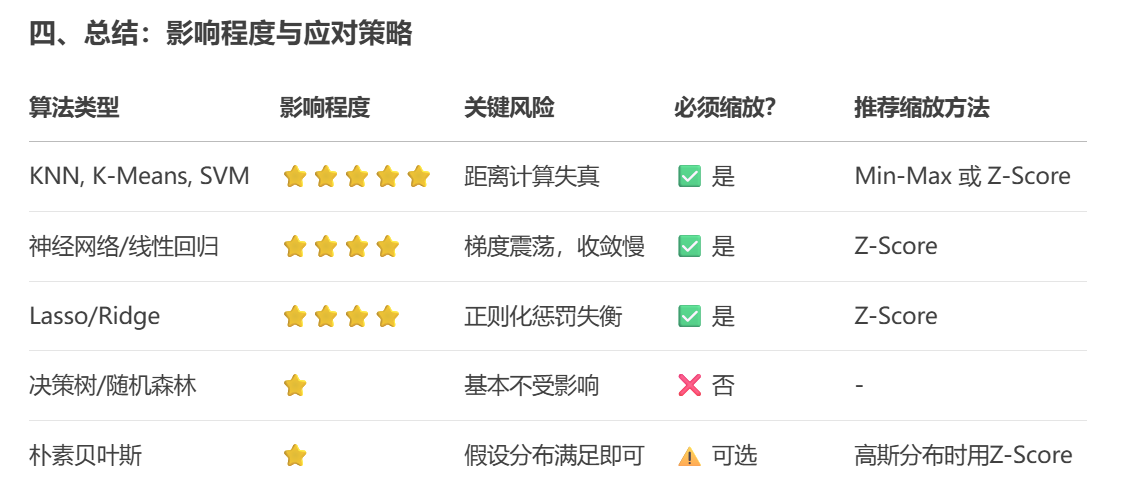

In [33]:
# 3.训练逻辑回归模型时，梯度下降可能会卡在局部最小值中吗？

# 当损失函数是凸函数时，梯度下降通常不会卡在局部最小值;如果损失函数为非凸函数，梯度下降会卡在局部最小值(谷底)或鞍点。

一，凸函数定义:
设函数 f: I → ℝ，其中 I 是实数轴 ℝ 上的一个区间（例如 (a, b), [a, b], (-∞, ∞) 等）。如果对于 I 中任意两点 x₁, x₂ 和任意 λ ∈ [0, 1]，都满足以下不等式：
f(λx₁ + (1 - λ)x₂) ≤ λf(x₁) + (1 - λ)f(x₂)那么函数 f 被称为在区间 I 上的凸函数。
几何解释:
函数图像上任意两点之间的线段（弦）总是位于函数图像本身的上方（或恰好在图像上）。

二，凸函数的重要性质:
1.局部最小值即全局最小值
2.切线/支撑超平面位于图像下方

三，例子:
1,线性函数:f(x) = ax + b (a, b 为常数)
2,二次函数:f(x) = ax² + bx + c
3,指数函数:f(x) = e^{ax} (a 为常数)
4,负熵:f(x) = x ln x (定义域通常为 x > 0)
5,绝对值幂函数:f(x) = |x|^p
6,负对数:f(x) = -ln x (定义域 x > 0)
7,Log-Sum-Exp:f(x) = ln(e^{x₁} + e^{x₂} + ... + e^{xₙ}) (定义域 ℝⁿ)
8,范数:在 ℝⁿ 上，任何范数 ||·|| 都是凸函数。


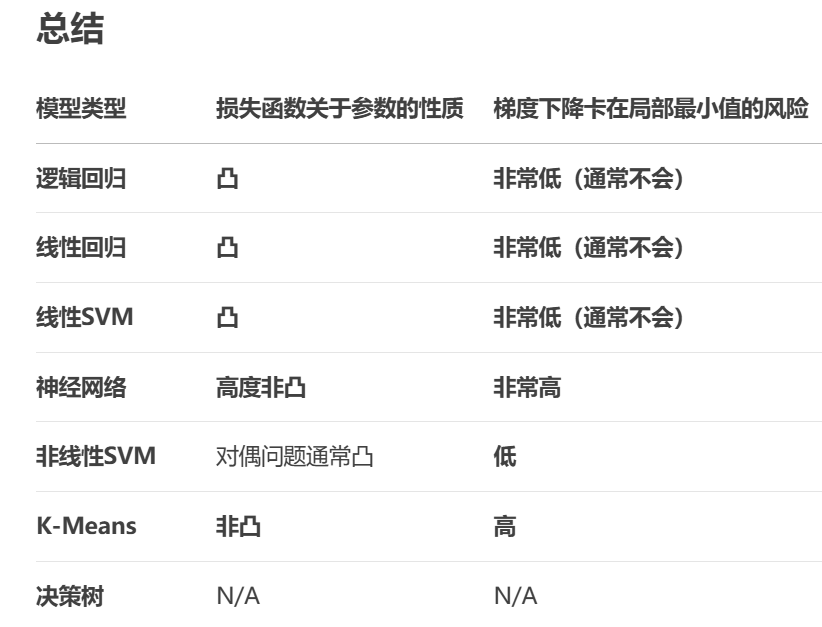

In [34]:
# 4.如果你让它们运行足够长的时间，是否所有的梯度下降算法都能得出相同的模型？
# 不一定。
# 凸问题：若损失函数是严格凸的（如线性回归、逻辑回归），所有梯度下降变体理论上会收敛到唯一全局最优解，模型相同。
# 非凸问题（如神经网络）：存在多个局部最小值。不同算法（SGD、Adam）、批量大小、初始化、学习率可能导致收敛到不同的局部最优解，模型表现可能差异很大。
# 随机性影响：SGD和小批量GD因数据采样顺序不同，可能收敛到不同解。

In [35]:
# 5.假设你使用批量梯度下降，并在每个轮次绘制验证误差。如果你发现验证错误持续上升，那么可能是什么情况？你该如何解决？
# 原因：
# 过拟合：模型过度拟合训练集，泛化能力下降。
# 学习率过大：参数更新步幅过大，越过最优解导致发散。
# 数据不匹配：验证集分布与训练集差异大（如数据划分错误）。
# 解决方案：
# 早停（Early Stopping）：在验证误差开始上升时停止训练。
# 降低学习率：减小步长，避免震荡。
# 正则化：添加L2（岭回归）或L1（Lasso）惩罚项抑制过拟合。
# 数据检查：确保训练集/验证集同分布。

In [36]:
# 6.当验证误差上升时立即停止小批量梯度下降是个好主意吗？
# 不是。
# 原因:
# 小批量噪声：单次验证误差上升可能由小批量采样噪声引起，需观察连续多轮的趋势。
# 早停策略：应设置耐心值（patience）（如连续5轮验证误差上升才停止），避免过早终止。
# 学习率调整：尝试先降低学习率而非立即停止。

In [37]:
# 7. 哪种梯度下降算法（在我们讨论过的算法中）将最快地到达最佳解附近？哪个实际上会收敛？如何使其他的也收敛
# 随机梯度下降会最快到达最佳解附近，批量和小批量梯度下降会收敛，可以使用学习率衰减使随机梯度下降收敛。

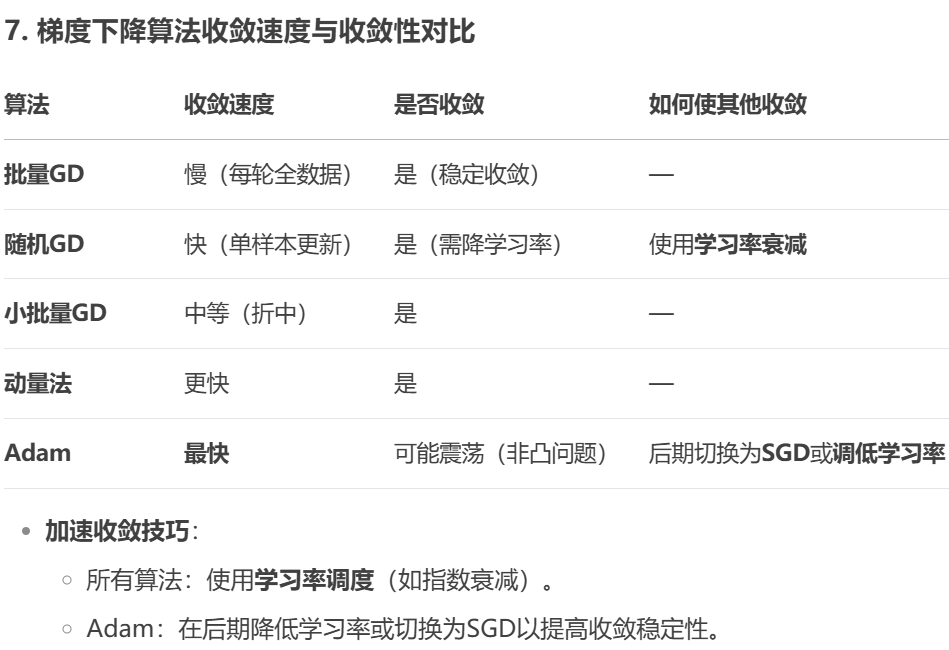

In [38]:
# 8. 假设你正在使用多项式回归。绘制学习曲线后，你会发现训练误差和验证误差之间存在很大的差距。发生了什么？解决此问题的三种方法是什么？
# 原因：过拟合（模型复杂度过高，拟合了训练数据噪声）。
# 解决方案：
# 1)降低模型复杂度：减少多项式阶数。
# 2)正则化：添加L2（岭回归）或L1（Lasso）惩罚项。
# 3)增加训练数据：更多数据抑制过拟合。

In [39]:
# 9. 假设你正在使用岭回归，并且你注意到训练误差和验证误差几乎相等且相当高。你是否会说模型存在高偏差或高方差？你应该增加正则化超参数α还是减小它呢？
# 高偏差（欠拟合）,减小α（降低约束强度，让模型更灵活）

In [40]:
# 10. 为什么要使用：a.岭回归而不是简单的线性回归（即没有任何正则化）？b.Lasso而不是岭回归？c.弹性网络而不是Lasso回归？
# a:防止过拟合（尤其特征相关时），提高泛化能力。,b:需要特征选择（L1惩罚将不重要特征的系数压缩至0）,c:Lasso在特征高度相关时不稳定，弹性网络（L1+L2）可以综合稀疏性（L1）和稳定性（L2）来缓解此问题。

In [41]:
# 11. 假设你要将图片分类为室外/室内和白天/夜间。你应该实现两个逻辑回归分类器还是一个softmax回归分类器？
# 应使用两个独立的逻辑回归分类器。
# 原因:
# 标签是多标签（一张图可同时是“室外+白天”、“室内+夜间”等）而非互斥，Softmax回归假设类别互斥（单标签分类）

编程题

In [42]:
# todo 编程题: 在不使用sklearn的情况下，仅使用Numpy，为softmax回归实现带早停的批量梯度下降，将它用于分类任务，
#  例如鸢尾花数据集  load_iris, 只用两个特征就可以："petal width (cm)", "petal length (cm)"
#  强调：除了读数据，其他全用numpy （包括分离测试+验证），不用sklearn

#  注意：
#  1. 要实现l2正则化
#  2. 除了数据读取，其他仅使用numpy，包括训练集+验证集分离，以及softmax预测 和 损失计算

In [43]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


# 加载数据
iris = load_iris()
X, y = iris.data, iris.target

# 划分训练集/测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# 训练模型
clf = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    C=1.0,
    max_iter=2000,
    random_state=42
)
clf.fit(X_train, y_train)

# 评估准确率
accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


0.8
(120, 4) (120,)
Early stopping at epoch 357
Train Accuracy: 0.9896
Validation Accuracy: 0.8750
Test Accuracy: 1.0000


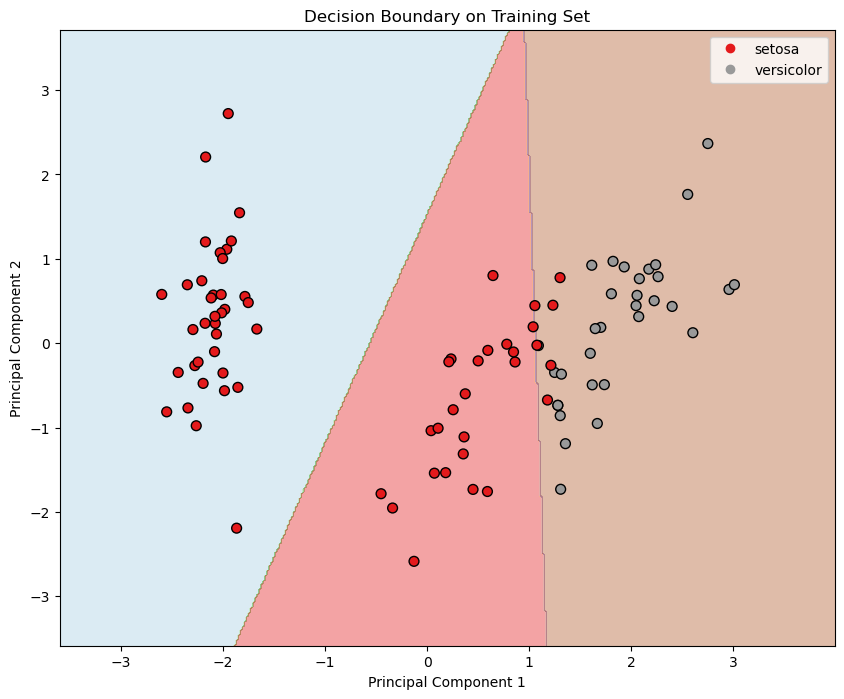

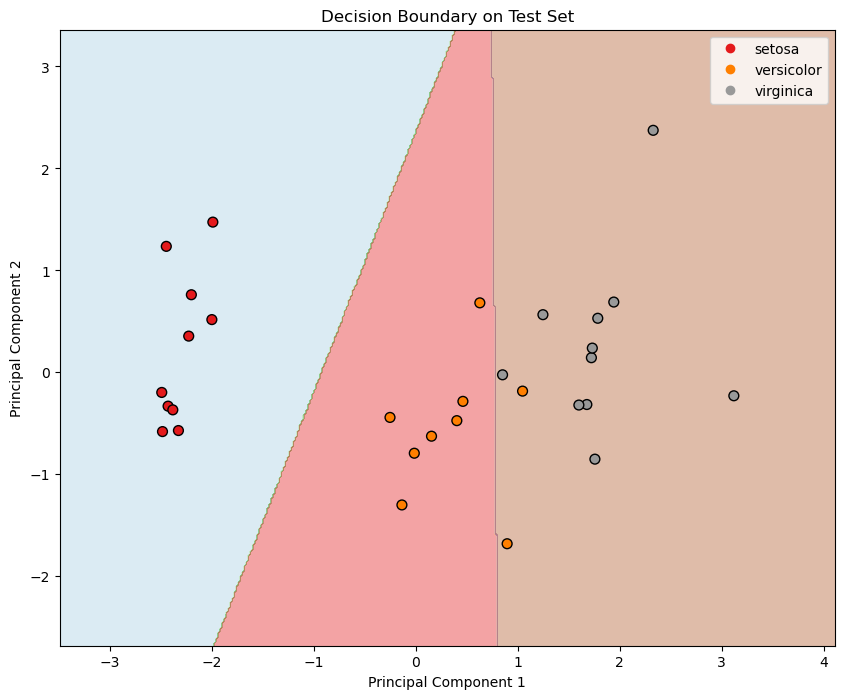

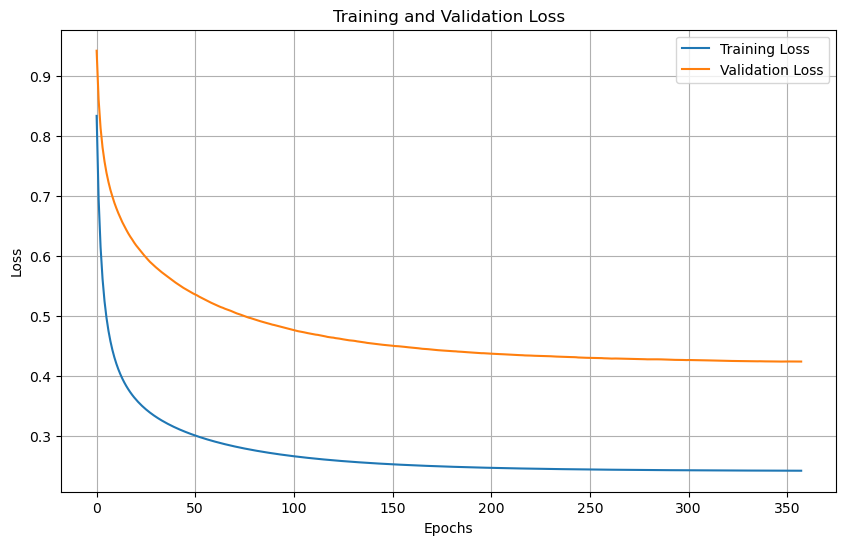

In [51]:
# 用纯numpy实现

# 加载数据
iris = load_iris()
X, y = iris.data, iris.target

# 数据准备
# 划分训练集/测试集
import numpy as np

def shuffle_and_split_data(X,y, test_ratio):
    shuffled_indices = np.random.permutation(len(X))
    test_set_size = int(len(X) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return X[train_indices],X[test_indices],y[train_indices],y[test_indices]

np.random.seed(42)
X_train, X_test, y_train, y_test=shuffle_and_split_data(X,y,0.2)
print(len(X_train)/len(X))

# 数据预处理：标准化
def standardize(X_train, X_test):
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)
    std[std == 0] = 1e-8  # 避免除以0
    X_train_std = (X_train - mean) / std
    X_test_std = (X_test - mean) / std
    return X_train_std, X_test_std

X_train, X_test = standardize(X_train, X_test)

# 添加偏置项
X_train_bias = np.hstack((X_train, np.ones((X_train.shape[0], 1))))
X_test_bias = np.hstack((X_test, np.ones((X_test.shape[0], 1))))

# One-hot编码标签
def one_hot_encode(y, num_classes):
    encoded = np.zeros((len(y), num_classes))
    encoded[np.arange(len(y)), y] = 1
    return encoded

y_train_oh = one_hot_encode(y_train, 3)
y_test_oh = one_hot_encode(y_test, 3)

print(X_train.shape,y_train.shape)

# 模型准备
# 1. 实现正则化
def l1_reg(weights, lambda_):
    # L1正则化项: lambda * ||weights||_1
    reg_term = lambda_ * np.sum(np.abs(weights))
    # L1梯度: lambda * sign(weights)
    reg_gradient = lambda_ * np.sign(weights)
    reg_gradient[weights == 0] = 0
    return reg_term, reg_gradient

def l2_reg(weights, lambda_):
    # L2正则化项: (lambda/2) * ||weights||^2_2
    reg_term = 0.5 * lambda_ * np.sum(weights**2)
    # L2梯度: lambda * weights
    reg_gradient = lambda_ * weights  #正则化梯度
    return reg_term, reg_gradient

# 2. 实现softmax函数
def softmax(x):
    e_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return e_x / np.sum(e_x, axis=-1, keepdims=True)

# 3. 计算交叉熵损失
def cross_entropy_loss(y_true, y_pred, weights, lambda_, reg_func):
    n_samples = y_true.shape[0]
    log_probs = np.log(y_pred + 1e-8)
    ce_loss = -np.sum(y_true * log_probs) / n_samples
    reg_term, _ = reg_func(weights, lambda_)
    return ce_loss + reg_term

# 4. 计算梯度
def compute_gradient(X, y_true, y_pred, weights, lambda_, reg_func):
    n_samples = X.shape[0]
    error = y_pred - y_true
    dw = np.dot(X.T, error) / n_samples
    _, reg_gradient = reg_func(weights, lambda_)
    dw += reg_gradient
    return dw

# 5. 实现带早停的批量梯度下降
def batch_gradient_descent(X, y, X_val, y_val, n_classes, learning_rate=0.1,
                          lambda_=0.01, epochs=1000, batch_size=32, patience=5,
                          reg_func=l2_reg):
    n_features = X.shape[1]
    weights = np.random.randn(n_features, n_classes) * 0.01

    best_val_loss = float('inf')
    best_weights = weights.copy()
    patience_counter = 0
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        indices = np.arange(X.shape[0])
        np.random.shuffle(indices)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, X.shape[0], batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            logits = np.dot(X_batch, weights)
            y_pred = softmax(logits)
            dw = compute_gradient(X_batch, y_batch, y_pred, weights, lambda_, reg_func)
            weights -= learning_rate * dw

        # 计算训练损失
        train_logits = np.dot(X, weights)
        train_pred = softmax(train_logits)
        train_loss = cross_entropy_loss(y, train_pred, weights, lambda_, reg_func)
        train_losses.append(train_loss)

        # 计算验证损失
        val_logits = np.dot(X_val, weights)
        val_pred = softmax(val_logits)
        val_loss = cross_entropy_loss(y_val, val_pred, weights, lambda_, reg_func)
        val_losses.append(val_loss)

        # 早停机制
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_weights = weights.copy()
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"Early stopping at epoch {epoch}")
                break

    return best_weights, train_losses, val_losses

# 模型训练
# 划分训练集和验证集
def train_val_split(X, y, val_ratio=0.2):
    n_val = int(X.shape[0] * val_ratio)
    val_indices = np.random.choice(X.shape[0], n_val, replace=False)
    train_indices = np.setdiff1d(np.arange(X.shape[0]), val_indices)
    return X[train_indices], X[val_indices], y[train_indices], y[val_indices]

X_train_sub, X_val, y_train_oh_sub, y_val_oh = train_val_split(X_train_bias, y_train_oh, val_ratio=0.2)

# 训练模型
weights, train_losses, val_losses = batch_gradient_descent(
    X_train_sub, y_train_oh_sub, X_val, y_val_oh, n_classes=3,
    learning_rate=0.1, lambda_=0.01, epochs=1000,
    batch_size=32, patience=10, reg_func=l2_reg
)

# 评估准确率
def evaluate_accuracy(X, y_true, weights):
    logits = np.dot(X, weights)
    y_pred = softmax(logits)
    predicted_classes = np.argmax(y_pred, axis=1)
    true_classes = np.argmax(y_true, axis=1)
    accuracy = np.mean(predicted_classes == true_classes)
    return accuracy

train_accuracy = evaluate_accuracy(X_train_sub, y_train_oh_sub, weights)
val_accuracy = evaluate_accuracy(X_val, y_val_oh, weights)
test_accuracy = evaluate_accuracy(X_test_bias, y_test_oh, weights)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# 可视化决策边界函数
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def plot_decision_boundary(X, y, weights, title):
    # 使用PCA降维到2维
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X[:, :-1])  # 移除偏置项

    # 创建网格
    h = 0.02
    x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
    y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # 将网格点转换回原始特征空间（4维）
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    grid_points_full = pca.inverse_transform(grid_points)
    grid_points_full = np.hstack((grid_points_full, np.ones((grid_points_full.shape[0], 1))))

    # 预测网格点类别
    logits = np.dot(grid_points_full, weights)
    Z = np.argmax(softmax(logits), axis=1)
    Z = Z.reshape(xx.shape)

    # 绘制决策边界
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.Paired)

    # 绘制数据点
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y,
                          cmap=plt.cm.Set1, edgecolor='k', s=50)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(title)
    plt.legend(handles=scatter.legend_elements()[0],
               labels=iris.target_names.tolist())
    plt.show()

# 可视化训练集决策边界
plot_decision_boundary(X_train_sub, y_train[np.argmax(y_train_oh_sub, axis=1)], weights, "Decision Boundary on Training Set")

# 可视化测试集决策边界
plot_decision_boundary(X_test_bias, y_test, weights, "Decision Boundary on Test Set")

# 绘制训练和验证损失曲线
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()